In [1]:
#=================================Import library========================================================
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#=================================Read Data =================================================================
df = pd.read_csv('Data_card_crime.csv')

In [3]:
#===================Get column feature X and column Label Y===========================================
from sklearn.preprocessing import LabelEncoder
y=df.iloc[:,-1]
X=df.iloc[:, :-1]

In [4]:
#===================== Scale the data=========================
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [5]:
#===========train data to train and testing========================
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [6]:
#======================Model Logistic Regresion=========================
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [7]:
#========================Print Results==============================
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [19]:
#======================Draw Confusion Matrix======================
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.metrics import classification_report_imbalanced
import seaborn as sns
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
import itertools

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

def plot_confusion_matrix(cm, classes=None,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    mpl.rcParams.update(mpl.rcParamsDefault)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
    plt.figure(figsize=(5, 5)) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(shrink=0.75)
    tick_marks = np.arange(len(list(range(cm.shape[0]))))
#     plt.xticks(tick_marks, classes, rotation=45)
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes,rotation=100)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    return plt


Normalized confusion matrix
[[0.81559004 0.18440996]
 [0.27947598 0.72052402]]


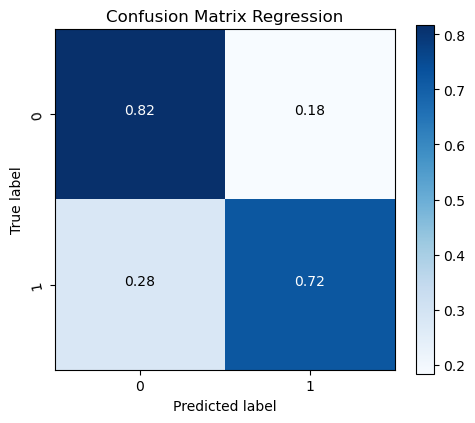

In [20]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
y_pred = logreg.predict(X_test)
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion_matrix(y_pred,y_test),  normalize=True,title='Confusion Matrix Regression')
plt.savefig("confusion_logitic.pdf")
plt.show()